## **Logistic Regression**

* Convergence
* Regularization (L1 and L2)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/charged_off_loans.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
## missing values
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [3]:
## check # levels on categorical vars
for i in df.select_dtypes(include='object'):
  print(f'Variable {i} has {df[i].nunique()} levels')

Variable person_gender has 2 levels
Variable person_education has 5 levels
Variable person_home_ownership has 4 levels
Variable loan_intent has 6 levels
Variable previous_loan_defaults_on_file has 2 levels


In [5]:
## encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [6]:
## Make sure there is NO perfect collinearity
## remove any variables with cor of |0.99|
# Create a correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.99)
threshold = 0.99
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated features
df = df.drop(columns=to_drop)

print(f"Columns removed: {to_drop}")

Columns removed: []


In [7]:
from re import X
## X and y
X = df.drop(columns='loan_status')
y = df['loan_status'] ## loan is charged off

In [8]:
## 70% training 30% test random_state = 13
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [9]:
X_train.shape

(31500, 22)

### **Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression

## instance
## liblinear solver has SMALLER steps. Most often converges but NOT as efficient
## steps to check converge: increase max_iter until convergence (use other solvers)
lr = LogisticRegression(solver = "liblinear", max_iter=1000)  ## by default L2 regularization

## fit
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [15]:
## SLOPE estimates
np.round(lr.coef_, 2)

array([[-0.06, -0.  ,  0.04,  0.  ,  0.31,  0.02,  0.03, -0.  , -0.01,
         0.01,  0.  , -0.01,  0.  ,  0.  , -0.07,  0.17, -0.07,  0.03,
         0.04, -0.02, -0.08, -0.58]])

In [16]:
pd.DataFrame(lr.coef_, columns=X_train.columns)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-0.057138,-0.000028,0.042207,0.000099,0.310218,0.020067,0.026864,-0.004095,-0.011292,0.0086,...,0.003063,0.000895,-0.069795,0.173849,-0.068223,0.034861,0.04128,-0.01986,-0.07785,-0.575992


In [19]:
## As income increases by $1, then the estimated log(odds) of default decrease by 0.000028 controlling for other factors
## As income increases by $1, then the estimated odds of default CHANGE BY A FACTOR OF 0.9999 controlling for other factors

In [22]:
## what if we have TOO MANY predictors, can we FORCE MORE regularization?
## we have the hyper-parameter C
## lower values of C create MORE regularization (more variables with estimates close to zero)
## What is the best C? might need grid-search
## L2 penalty makes the estimates CLOSE to zero
lr = LogisticRegression(solver = "liblinear", max_iter=1000, C = 0.05)  ## by default L2 regularization

## fit
lr.fit(X_train, y_train)

LogisticRegression(C=0.05, max_iter=1000, solver='liblinear')

In [23]:
pd.DataFrame(lr.coef_, columns=X_train.columns)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-0.057115,-0.000028,0.042206,0.000099,0.309574,0.020028,0.026842,-0.004084,-0.011274,0.008585,...,0.00306,0.000893,-0.069665,0.173521,-0.068096,0.034795,0.041202,-0.019823,-0.077704,-0.574916


In [24]:
## L2 is a norm
## L2 = sqrt(beta1^2 + beta^2 + ...)
np.linalg.norm(lr.coef_, 2) ## this is the PENALTY

0.6941671468901285

In [25]:
## l1 PENALTY
lr = LogisticRegression(solver = "liblinear", max_iter=1000, C = 0.05, penalty = "l1")  ## by default L2 regularization

## fit
lr.fit(X_train, y_train)

LogisticRegression(C=0.05, max_iter=1000, penalty='l1', solver='liblinear')

In [26]:
pd.DataFrame(lr.coef_, columns=X_train.columns)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,0.013069,-0.000002,-0.013538,-0.000061,0.313368,12.120131,0.0,-0.008403,0.0,0.0,...,0.0,0.0,-0.991017,0.728629,-0.697444,0.0,-0.073789,-0.498745,-0.948234,-6.567346


In [27]:
## Grid Search on penalty (L1 or L2) and also on C
from sklearn.model_selection import GridSearchCV

## 1) param grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5, 1]
}

## 2) instance of the model (LR)
lr = LogisticRegression(solver = "liblinear", max_iter=1000)

## 3) grid search instance
grid_model = GridSearchCV(lr, param_grid = param_grid, cv=5, n_jobs = -1, scoring = "f1")

## 4) fit
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [29]:
## best params
## not too regularized and l1 penalty
grid_model.best_params_

{'C': 1, 'penalty': 'l1'}

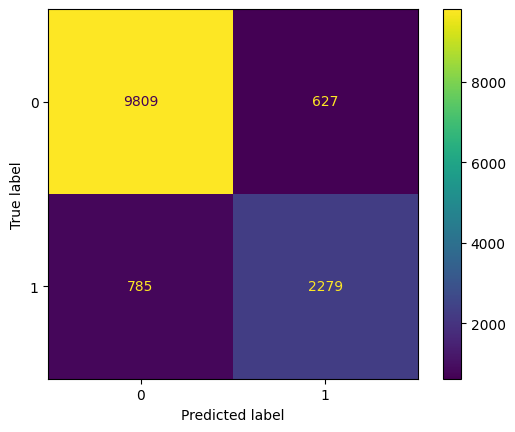

In [30]:
## Performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

## confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, grid_model.predict(X_test))).plot()

In [31]:
## detection
recall_score(y_test, grid_model.predict(X_test))

0.743798955613577

In [33]:
## Can we choose a better cutoff other than 50%
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_model.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.9537285951321346

In [34]:
## optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.20357669778107174

In [35]:
## make a prediction with this cutoff
yhat_LR = (grid_model.predict_proba(X_test)[:,1] >= optimal_threshold).astype(int)

In [36]:
yhat_LR

array([0, 0, 1, ..., 0, 1, 1])

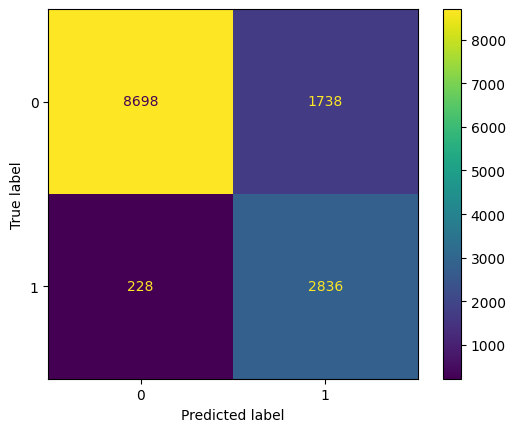

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_LR)).plot()